## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  62.203220  1505.063034  0.808142  10.228112  1218.009042
1  69.331527   933.039650  0.422291   9.605637   399.958547
2  18.608160  1483.489141  0.488721  10.729820   725.298293
3  49.307366  1279.241823  0.897511   9.488166  1149.153827
4  25.757308   454.877179  0.409500   3.118325   188.008510


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8976115	total: 57.4ms	remaining: 57.3s
1:	learn: 0.8886293	total: 58ms	remaining: 28.9s
2:	learn: 0.8797678	total: 58.5ms	remaining: 19.4s
3:	learn: 0.8671069	total: 59ms	remaining: 14.7s
4:	learn: 0.8542428	total: 59.5ms	remaining: 11.8s
5:	learn: 0.8435284	total: 60ms	remaining: 9.95s
6:	learn: 0.8318437	total: 60.5ms	remaining: 8.59s
7:	learn: 0.8204730	total: 61ms	remaining: 7.57s
8:	learn: 0.8089525	total: 61.5ms	remaining: 6.78s
9:	learn: 0.7981913	total: 62ms	remaining: 6.14s
10:	learn: 0.7871771	total: 62.5ms	remaining: 5.62s
11:	learn: 0.7774742	total: 62.9ms	remaining: 5.18s
12:	learn: 0.7658681	total: 63.3ms	remaining: 4.81s
13:	learn: 0.7561361	total: 63.8ms	remaining: 4.49s
14:	learn: 0.7471922	total: 64.3ms	remaining: 4.22s
15:	learn: 0.7381836	total: 64.9ms	remaining: 3.99s
16:	learn: 0.7278192	total: 65.3ms	remaining: 3.78s
17:	learn: 0.7196730	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7102117	total: 66.3ms	remaining: 3.42s
19

103:	learn: 0.2724480	total: 105ms	remaining: 904ms
104:	learn: 0.2693957	total: 105ms	remaining: 899ms
105:	learn: 0.2667008	total: 106ms	remaining: 892ms
106:	learn: 0.2639323	total: 106ms	remaining: 885ms
107:	learn: 0.2610968	total: 106ms	remaining: 879ms
108:	learn: 0.2587045	total: 107ms	remaining: 872ms
109:	learn: 0.2561028	total: 107ms	remaining: 867ms
110:	learn: 0.2538300	total: 108ms	remaining: 867ms
111:	learn: 0.2514303	total: 109ms	remaining: 862ms
112:	learn: 0.2486460	total: 109ms	remaining: 856ms
113:	learn: 0.2460588	total: 109ms	remaining: 851ms
114:	learn: 0.2431934	total: 110ms	remaining: 846ms
115:	learn: 0.2407372	total: 110ms	remaining: 841ms
116:	learn: 0.2383171	total: 111ms	remaining: 837ms
117:	learn: 0.2358667	total: 111ms	remaining: 833ms
118:	learn: 0.2336588	total: 112ms	remaining: 829ms
119:	learn: 0.2316486	total: 112ms	remaining: 824ms
120:	learn: 0.2289049	total: 113ms	remaining: 819ms
121:	learn: 0.2270461	total: 113ms	remaining: 816ms
122:	learn: 

277:	learn: 0.0629867	total: 186ms	remaining: 484ms
278:	learn: 0.0626153	total: 187ms	remaining: 483ms
279:	learn: 0.0622602	total: 187ms	remaining: 482ms
280:	learn: 0.0617433	total: 188ms	remaining: 481ms
281:	learn: 0.0612293	total: 188ms	remaining: 479ms
282:	learn: 0.0607932	total: 189ms	remaining: 478ms
283:	learn: 0.0602779	total: 189ms	remaining: 477ms
284:	learn: 0.0599929	total: 190ms	remaining: 476ms
285:	learn: 0.0594853	total: 190ms	remaining: 474ms
286:	learn: 0.0590422	total: 191ms	remaining: 473ms
287:	learn: 0.0585716	total: 191ms	remaining: 472ms
288:	learn: 0.0581098	total: 191ms	remaining: 471ms
289:	learn: 0.0576425	total: 192ms	remaining: 470ms
290:	learn: 0.0571524	total: 192ms	remaining: 468ms
291:	learn: 0.0567697	total: 193ms	remaining: 467ms
292:	learn: 0.0563991	total: 193ms	remaining: 466ms
293:	learn: 0.0560065	total: 193ms	remaining: 464ms
294:	learn: 0.0556511	total: 194ms	remaining: 463ms
295:	learn: 0.0552202	total: 194ms	remaining: 462ms
296:	learn: 

500:	learn: 0.0210590	total: 288ms	remaining: 287ms
501:	learn: 0.0209707	total: 288ms	remaining: 286ms
502:	learn: 0.0208930	total: 289ms	remaining: 285ms
503:	learn: 0.0207799	total: 289ms	remaining: 285ms
504:	learn: 0.0207478	total: 290ms	remaining: 284ms
505:	learn: 0.0207162	total: 290ms	remaining: 283ms
506:	learn: 0.0206030	total: 291ms	remaining: 283ms
507:	learn: 0.0205391	total: 291ms	remaining: 282ms
508:	learn: 0.0205081	total: 291ms	remaining: 281ms
509:	learn: 0.0204774	total: 292ms	remaining: 280ms
510:	learn: 0.0204149	total: 292ms	remaining: 280ms
511:	learn: 0.0202920	total: 293ms	remaining: 279ms
512:	learn: 0.0201655	total: 293ms	remaining: 278ms
513:	learn: 0.0200573	total: 294ms	remaining: 278ms
514:	learn: 0.0200279	total: 294ms	remaining: 277ms
515:	learn: 0.0199673	total: 295ms	remaining: 276ms
516:	learn: 0.0198602	total: 295ms	remaining: 276ms
517:	learn: 0.0197504	total: 295ms	remaining: 275ms
518:	learn: 0.0196435	total: 296ms	remaining: 274ms
519:	learn: 

678:	learn: 0.0108265	total: 369ms	remaining: 175ms
679:	learn: 0.0107789	total: 370ms	remaining: 174ms
680:	learn: 0.0107322	total: 371ms	remaining: 174ms
681:	learn: 0.0106786	total: 371ms	remaining: 173ms
682:	learn: 0.0106446	total: 371ms	remaining: 172ms
683:	learn: 0.0105998	total: 372ms	remaining: 172ms
684:	learn: 0.0105559	total: 372ms	remaining: 171ms
685:	learn: 0.0105229	total: 373ms	remaining: 171ms
686:	learn: 0.0104801	total: 373ms	remaining: 170ms
687:	learn: 0.0104478	total: 374ms	remaining: 170ms
688:	learn: 0.0104073	total: 374ms	remaining: 169ms
689:	learn: 0.0103625	total: 375ms	remaining: 168ms
690:	learn: 0.0103187	total: 375ms	remaining: 168ms
691:	learn: 0.0102774	total: 376ms	remaining: 167ms
692:	learn: 0.0102263	total: 376ms	remaining: 167ms
693:	learn: 0.0101871	total: 376ms	remaining: 166ms
694:	learn: 0.0101364	total: 377ms	remaining: 165ms
695:	learn: 0.0100929	total: 377ms	remaining: 165ms
696:	learn: 0.0100555	total: 378ms	remaining: 164ms
697:	learn: 

904:	learn: 0.0053237	total: 471ms	remaining: 49.4ms
905:	learn: 0.0053195	total: 471ms	remaining: 48.9ms
906:	learn: 0.0053018	total: 472ms	remaining: 48.4ms
907:	learn: 0.0052976	total: 472ms	remaining: 47.9ms
908:	learn: 0.0052826	total: 473ms	remaining: 47.3ms
909:	learn: 0.0052729	total: 473ms	remaining: 46.8ms
910:	learn: 0.0052581	total: 474ms	remaining: 46.3ms
911:	learn: 0.0052535	total: 474ms	remaining: 45.7ms
912:	learn: 0.0052390	total: 474ms	remaining: 45.2ms
913:	learn: 0.0052295	total: 475ms	remaining: 44.7ms
914:	learn: 0.0052260	total: 475ms	remaining: 44.1ms
915:	learn: 0.0052120	total: 476ms	remaining: 43.6ms
916:	learn: 0.0052048	total: 476ms	remaining: 43.1ms
917:	learn: 0.0051932	total: 477ms	remaining: 42.6ms
918:	learn: 0.0051656	total: 477ms	remaining: 42.1ms
919:	learn: 0.0051564	total: 478ms	remaining: 41.5ms
920:	learn: 0.0051531	total: 478ms	remaining: 41ms
921:	learn: 0.0051311	total: 478ms	remaining: 40.5ms
922:	learn: 0.0051196	total: 479ms	remaining: 39

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

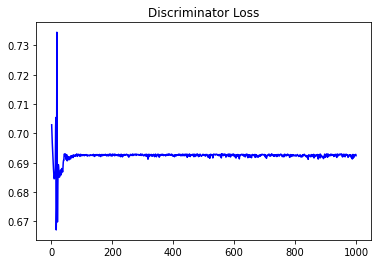

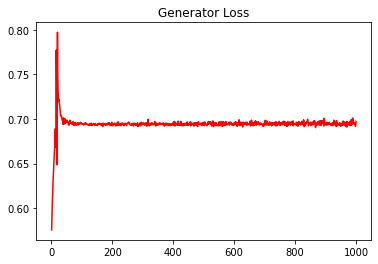

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.01794145413319244


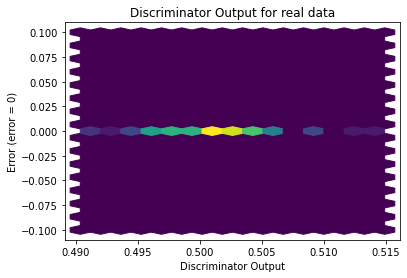

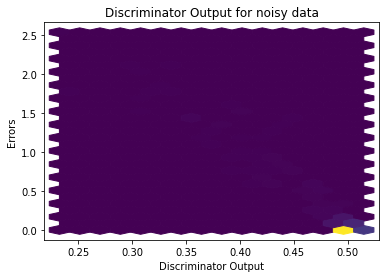

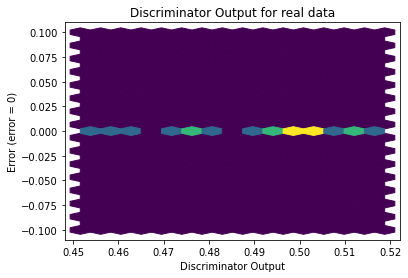

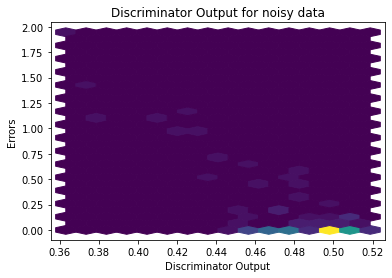

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


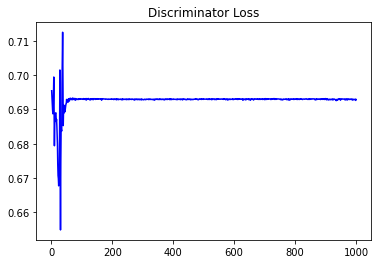

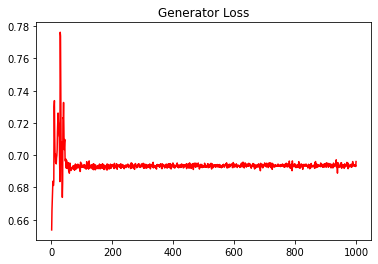

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03296980605678828


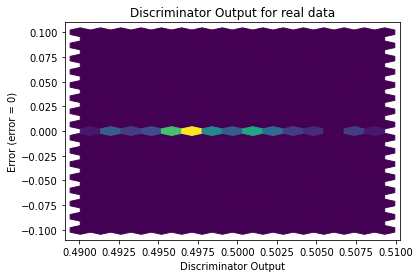

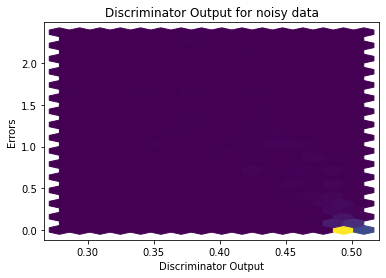

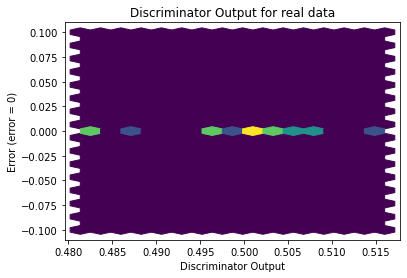

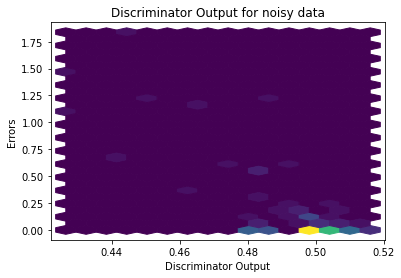

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8308]], requires_grad=True)
